<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Data_nacional_grafico_barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [204]:
def rango_edades(df):
  categoria = list(df['Grupo de edad'].drop_duplicates())
  rango=[]
  for elem in categoria:
    elem = elem.replace(' años','')
    rango.append(elem)
  return rango

In [246]:
def graficar_genero_etario(csv,nombre_grafico):
  df=pd.read_csv(csv, sep= ',')
  #Se obtiene la ultima fecha que tiene el df
  Fecha_actual= list(df.columns)[-1]
  #Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
  df_acotado = (df[['Grupo de edad', 'Sexo', Fecha_actual]]).dropna()
  #Se pueden generar 2 df; con la data de hombres y de mujeres
  df_F = df_acotado.groupby('Sexo').get_group('F').drop(['Sexo'], axis=1)
  df_M = df_acotado.groupby('Sexo').get_group('M').drop(['Sexo'], axis=1)
  #Luego, de estos df, se obtienen las listas con los valores segun su Sexo
  m = list(df_M[Fecha_actual])
  f = list(df_F[Fecha_actual])
  rango= rango_edades(df_acotado)
  x = np.arange(len(rango))
  fig = plt.figure(figsize =(15,5))

  ax = fig.add_axes([0,0,1,1])


  ax.bar(x - 0.17, f, color = 'c', width = 0.35)
  ax.bar(x + 0.17, m, color = 'm', width = 0.35)

  ax.legend(labels=['Mujeres', 'Hombres'],fontsize=12)

  ax.set_xticks(x)
  ax.set_xticklabels(rango)
  ax.set_title(nombre_grafico ,fontsize=20)
  ax.set_xlabel('Años',fontsize=15)
  ax.set_ylabel('Cantidad de personas',fontsize=15)
  #ax.bar(rango,f)
  plt.show()

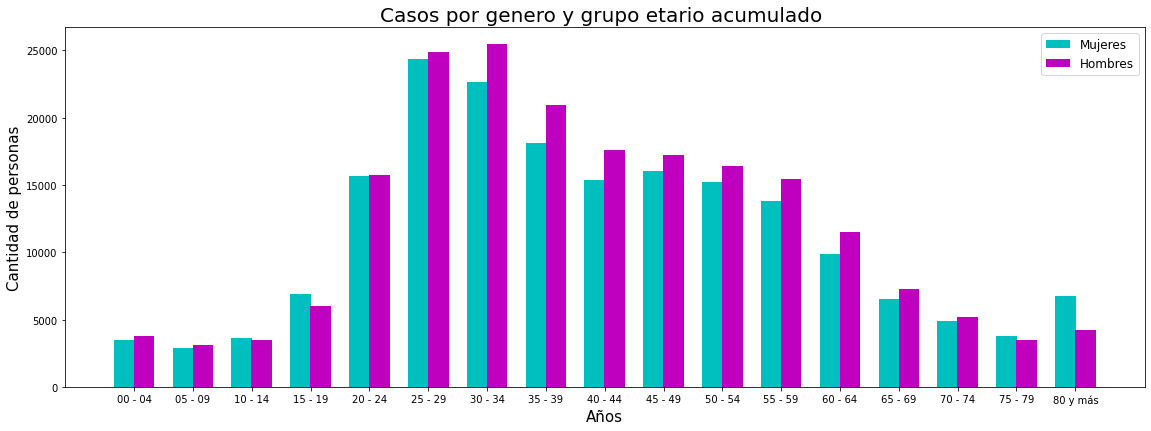

In [247]:
graficar_genero_etario('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv','Casos por genero y grupo etario acumulado ')


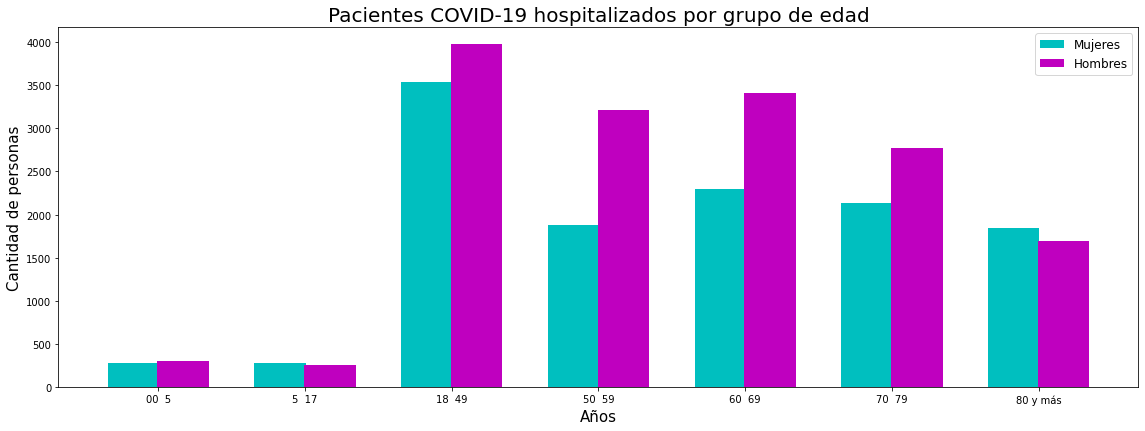

In [248]:
graficar_genero_etario('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto22/HospitalizadosEtario_Acumulado.csv','Pacientes COVID-19 hospitalizados por grupo de edad')

In [235]:
def graficar_etario(csv,nombre_grafico):
  df=pd.read_csv(csv, sep= ',')
  #Se obtiene la ultima fecha que tiene el df
  Fecha_actual= list(df.columns)[-1]
  #Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
  df_acotado = df[['Grupo de edad', Fecha_actual]]
  m = list(df_acotado[Fecha_actual])
  rango= list(df_acotado['Grupo de edad'])
  x = np.arange(len(rango))
  fig = plt.figure(figsize =(10,5))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(x, m, color = 'm')
  ax.set_xticks(x)
  ax.set_xticklabels(rango)
  ax.set_title(nombre_grafico ,fontsize=20)
  ax.set_xlabel('Años',fontsize=15)
  ax.set_ylabel('Cantidad de personas',fontsize=15)
  #ax.bar(rango,f)
  plt.show()


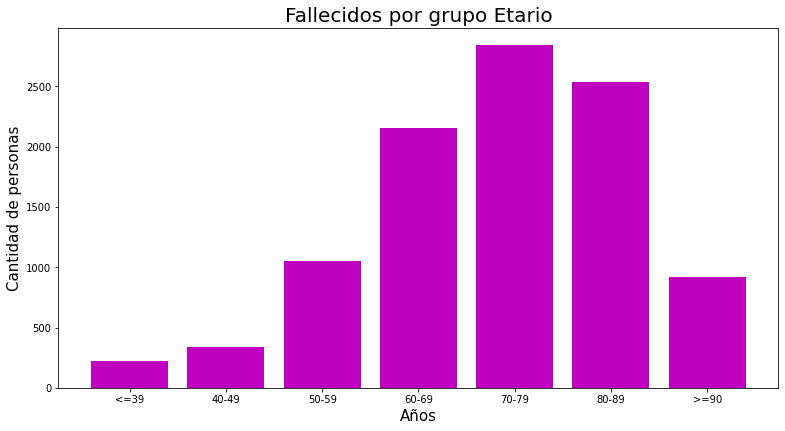

In [236]:
graficar_etario('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv','Fallecidos por grupo Etario')